In [4]:
!pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.5 MB 5.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.4/38.5 MB 6.3 MB/s eta 0:00:06
   --- ------------------------------------ 3.7/38.5 MB 5.9 MB/s eta 0:00:06
   ---- ----------------------------------- 4.7/38.5 MB 5.7 MB/s eta 0:00:06
   ------ --------------------------------- 6.0/38.5 MB 5.8 MB/s eta 0:00:06
   ------- -------------------------------- 7.1/38.5 MB 5.7 MB/s eta 0:00:06
   -------- ------------------------------- 7.9/38.5 MB 5.4 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/38.5 MB 5.2 MB/s eta 0:00:06
   --------- ------------------------------ 9.2/38.5 MB 5.0 MB/s eta 0:00:06
   ---------- ----------------------------- 9.7/38.5 MB 4.6 MB/s eta 0:00:07
   ---------- ----------------------------- 10.5/38.5 MB 4.5 MB/s eta 0:00:07
   ----------- ---------------------------- 11.3/38.5 MB 4.5 MB/s eta 0:00:07
   -

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [28]:
# 그래프 선의 종류
linestyles = ['-', '--', '-.', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability ({prob_sum})'
    print(f'expected value (E(X):{E(X):.4f})')
    print(f'variance ((V(X)):{V(X):.4f})')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()

    plt.show()

In [29]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [30]:
p = 0.3
X = Bern(p)

In [37]:
check_prob(X)
p = 0.3
rv = stats.bernoulli(p)

expected value (E(X):0.3000)
variance ((V(X)):0.2100)


In [38]:
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [39]:
rv.pmf([0, 1])

array([0.7, 0.3])

In [40]:
rv.cdf([0, 1])

array([0.7, 1. ])

In [41]:
rv.mean(), rv.var()

(0.300, 0.210)

In [45]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [46]:
n = 10
p = 0.3
X = Bin(n,p)

In [47]:
check_prob(X)

expected value (E(X):3.0000)
variance ((V(X)):2.1000)


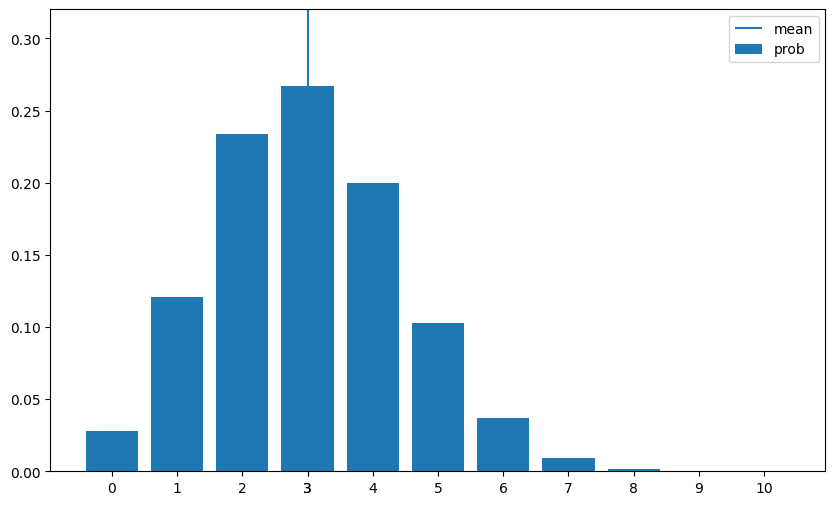

In [48]:
plot_prob(X)

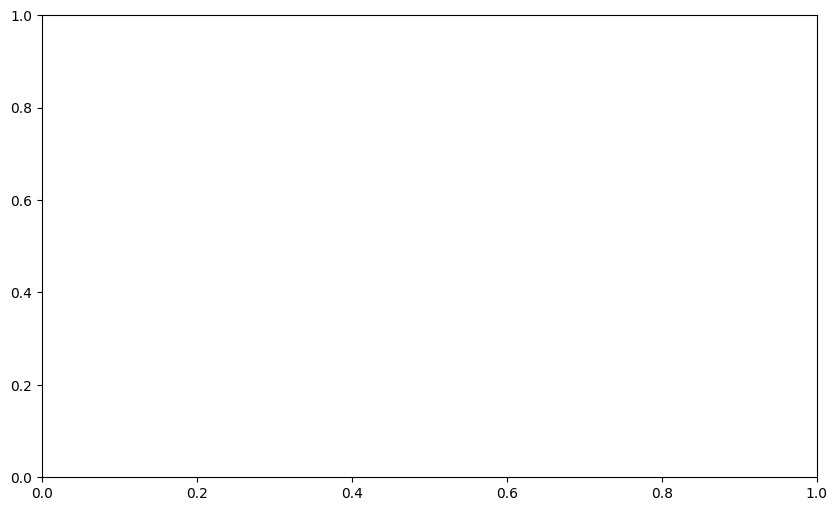

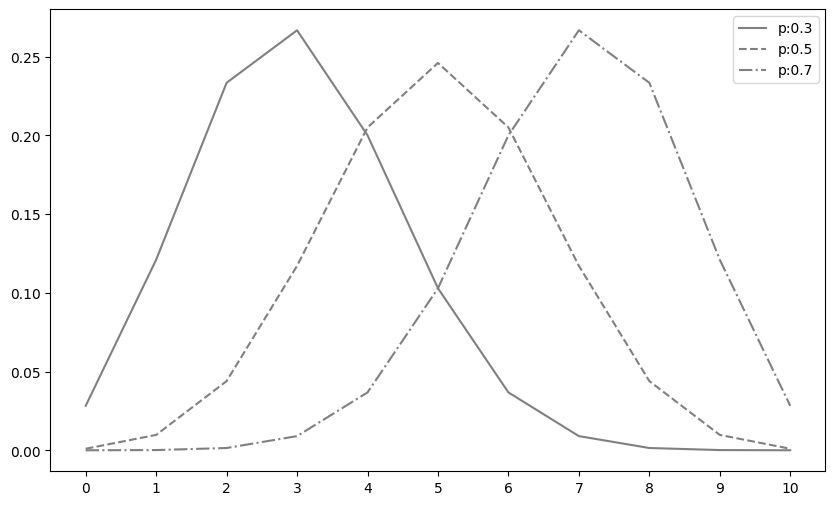

In [50]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

In [51]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [52]:
p = 0.5
X = Ge(p)

In [53]:
check_prob(X)

expected value (E(X):2.0000)
variance ((V(X)):2.0000)


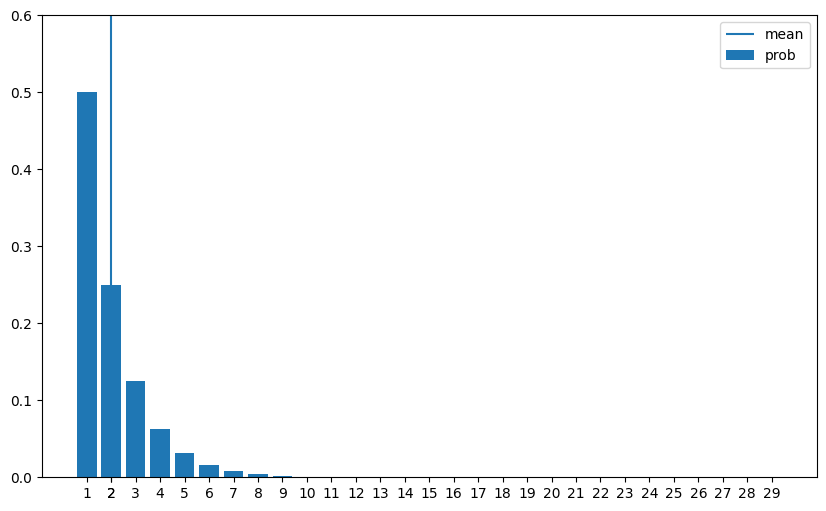

In [54]:
plot_prob(X)

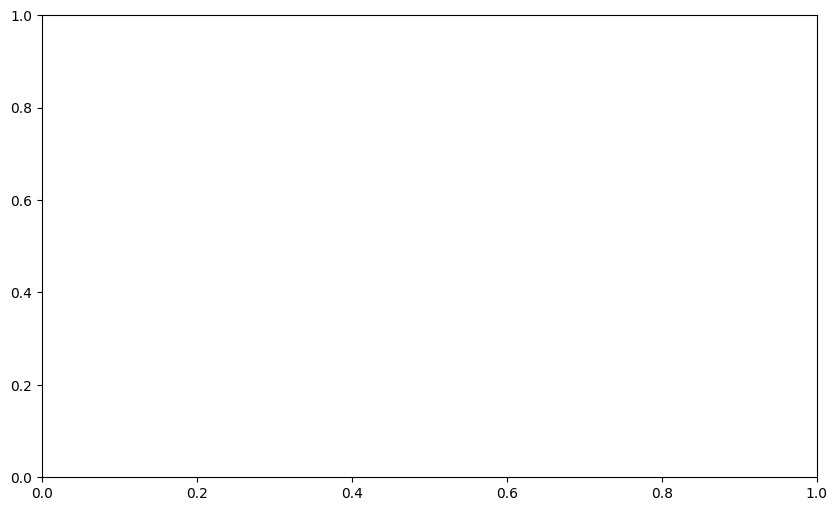

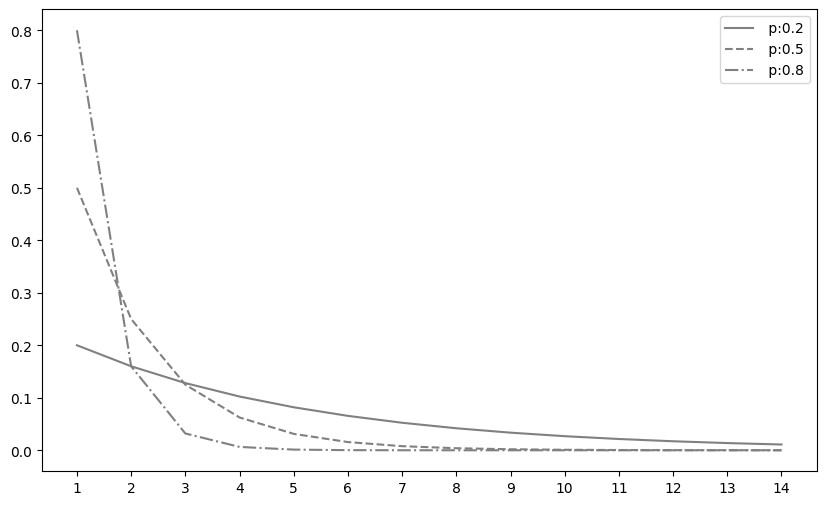

In [56]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f' p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

In [57]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [58]:
lam = 3
X = Poi(lam)

In [59]:
check_prob(X)

expected value (E(X):3.0000)
variance ((V(X)):3.0000)


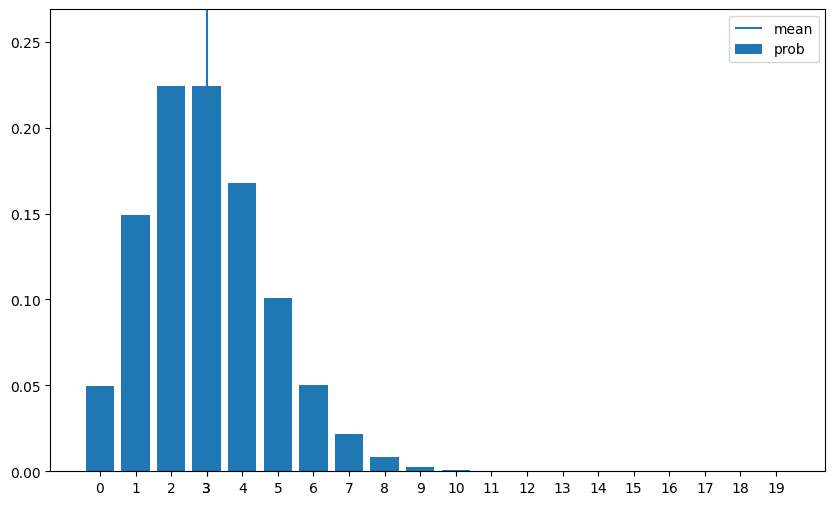

In [60]:
plot_prob(X)

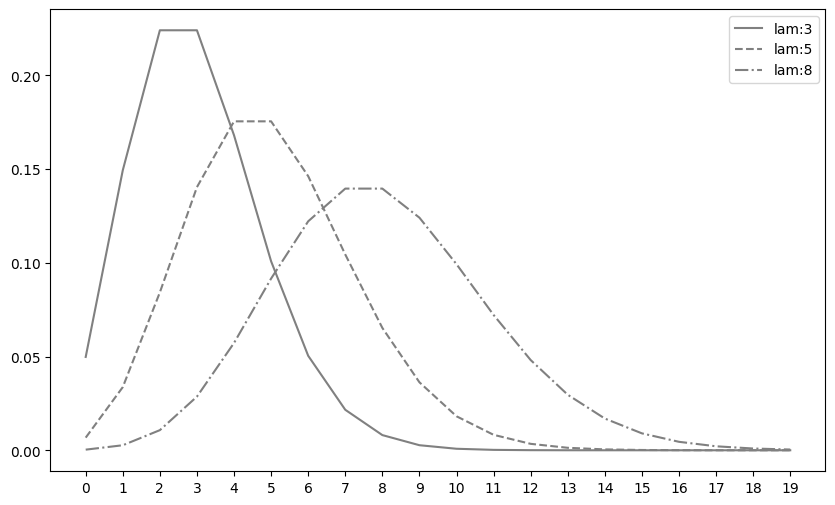

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()